In [1]:
%%capture

pip install git+https://github.com/ergodic-ai/magpy.git

In [2]:
import numpy as np, pandas as pd
import networkx as nx
from magpy.search.astar import AStarSearch, bic_score_node
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data = data.iloc[:10_000, 10:20]

In [4]:
data.corr().style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1).format(precision=1)

,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
V10,1.0,-0.1,0.1,-0.0,-0.0,0.1,0.1,0.1,-0.0,0.0
V11,-0.1,1.0,-0.3,0.2,0.1,-0.1,-0.0,0.0,0.0,-0.1
V12,0.1,-0.3,1.0,-0.4,-0.2,0.2,-0.1,-0.1,-0.0,0.0
V13,-0.0,0.2,-0.4,1.0,0.3,-0.1,0.1,0.2,0.1,-0.0
V14,-0.0,0.1,-0.2,0.3,1.0,-0.1,0.3,0.3,0.1,-0.0
V15,0.1,-0.1,0.2,-0.1,-0.1,1.0,0.0,-0.1,-0.0,0.0
V16,0.1,-0.0,-0.1,0.1,0.3,0.0,1.0,0.1,0.2,-0.1
V17,0.1,0.0,-0.1,0.2,0.3,-0.1,0.1,1.0,-0.0,-0.1
V18,-0.0,0.0,-0.0,0.1,0.1,-0.0,0.2,-0.0,1.0,0.1
V19,0.0,-0.1,0.0,-0.0,-0.0,0.0,-0.1,-0.1,0.1,1.0


In [5]:
%%time

astar = AStarSearch(data)
astar.run_scoring(func=bic_score_node, parallel=True)
result = astar.search()

  0%|          | 0/5120 [00:00<?, ?it/s]

CPU times: user 10.5 s, sys: 6.97 s, total: 17.5 s
Wall time: 23.8 s


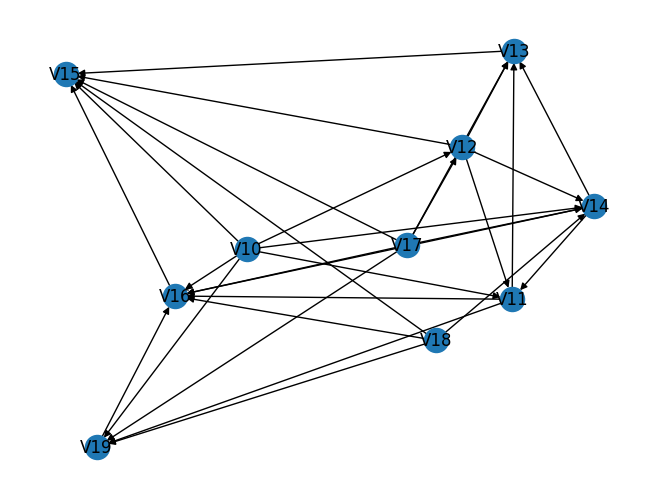

In [6]:
G = nx.from_pandas_adjacency(result, create_using=nx.DiGraph)

nx.draw(G, with_labels=True)
plt.show()